# 匹配滤波器 Matched filter

假设检验在凌星光变曲线研究中非常常见，特别是在寻找是否存在凌星信号时。

Neyman-Pearson检验是一种经典的假设检验方法，适合在两种明确假设（如 $H_0$ 和 $H_1$）之间做出选择。

### Neyman-Pearson检验的核心思想
1. **假设定义**：
   - $H_0$（原假设）：没有凌星信号，光变曲线只是背景噪声的结果。
   - $H_1$（备择假设）：有凌星信号，光变曲线中含有凌星信号的特征。

2. **似然比函数**：
   - 似然函数衡量的是某个假设在观察到的数据下的“合理性”。
   - 对于假设 $H_0$ 和 $H_1$，定义它们各自的似然函数：
     $$
     L(H_0) = P(\text{data} | H_0) \quad \text{和} \quad L(H_1) = P(\text{data} | H_1)
     $$
   - **似然比**是两个似然函数的比值：
     $$
     \Lambda = \frac{L(H_1)}{L(H_0)}
     $$

3. **检验规则**：
   - 给定一个阈值 $\tau$，与似然比进行比较：
     - 如果 $\Lambda > \tau$，选择 $H_1$（认为存在凌星信号）。
     - 如果 $\Lambda \leq \tau$，选择 $H_0$（认为没有凌星信号）。

### 解释：
- **当 $\Lambda > \tau$：** 数据更支持 $H_1$，说明凌星信号比背景噪声的解释更合理。
- **当 $\Lambda \leq \tau$：** 数据更支持 $H_0$，说明凌星信号的存在不够显著。

### 阈值 $\tau$ 的作用：
- $\tau$ 的选择会影响错误率：
  - **第一类错误（$\alpha$）**：错误地拒绝 $H_0$，即误判没有凌星信号时认为有信号。
  - **第二类错误（$\beta$）**：错误地接受 $H_0$，即误判有凌星信号时认为没有信号。
- 一般根据实验要求，预先设置一个 $\alpha$（比如 5%），从而确定合适的 $\tau$。

如果需要更深入的推导，或实际应用的示例代码，欢迎告诉我！

好的，下面是详细推导步骤，从似然比函数 $\Lambda$ 到简化后的检验统计量 $R$ 的推导过程：

---

### 1. **观测数据模型**
假设观测数据 $x \in \mathbb{R}^n$ 是信号 $s$ 和噪声 $n$ 的叠加：
$$
x = s + n,
$$
其中：
- 噪声 $n \sim \mathcal{N}(0, \Sigma_n)$，协方差矩阵为 $\Sigma_n$。
- $s$ 是假设信号。

在假设 $H_0$ 和 $H_1$ 下：
- $H_0$：只有噪声，$x \sim \mathcal{N}(0, \Sigma_n)$。
- $H_1$：信号和噪声共存，$x \sim \mathcal{N}(s, \Sigma_n)$。

---

### 2. **似然函数**

#### **(1) $H_0$ 的似然函数**
在 $H_0$ 下，数据 $x$ 的概率密度函数为：
$$
P(x | H_0) = \frac{1}{(2\pi)^{n/2} |\Sigma_n|^{1/2}} \exp\left(-\frac{1}{2} x^T \Sigma_n^{-1} x\right).
$$

#### **(2) $H_1$ 的似然函数**
在 $H_1$ 下，数据 $x$ 的概率密度函数为：
$$
P(x | H_1) = \frac{1}{(2\pi)^{n/2} |\Sigma_n|^{1/2}} \exp\left(-\frac{1}{2} (x - s)^T \Sigma_n^{-1} (x - s)\right).
$$

---

### 3. **似然比函数**
根据 Neyman–Pearson 检验，构造似然比函数：
$$
\Lambda = \frac{P(x | H_1)}{P(x | H_0)}.
$$

将 $P(x | H_1)$ 和 $P(x | H_0)$ 的表达式代入：
$$
\Lambda = \frac{\exp\left(-\frac{1}{2} (x - s)^T \Sigma_n^{-1} (x - s)\right)}{\exp\left(-\frac{1}{2} x^T \Sigma_n^{-1} x\right)}.
$$

分母与分子中归一化常数相同，可以直接消去，化简为：
$$
\Lambda = \exp\left(-\frac{1}{2} (x - s)^T \Sigma_n^{-1} (x - s) + \frac{1}{2} x^T \Sigma_n^{-1} x\right).
$$

---

### 4. **展开平方项**
对 $(x - s)^T \Sigma_n^{-1} (x - s)$ 展开：
$$
(x - s)^T \Sigma_n^{-1} (x - s) = x^T \Sigma_n^{-1} x - 2 s^T \Sigma_n^{-1} x + s^T \Sigma_n^{-1} s.
$$

将其代入 $\Lambda$ 的表达式：
$$
\Lambda = \exp\left(-\frac{1}{2} \left[x^T \Sigma_n^{-1} x - 2 s^T \Sigma_n^{-1} x + s^T \Sigma_n^{-1} s \right] + \frac{1}{2} x^T \Sigma_n^{-1} x\right).
$$

---

### 5. **合并项**
$$
\Lambda = \exp\left(\frac{1}{2} \left[ 2 s^T \Sigma_n^{-1} x - s^T \Sigma_n^{-1} s \right]\right).
$$

进一步化简：
$$
\Lambda = \exp\left(s^T \Sigma_n^{-1} x - \frac{1}{2} s^T \Sigma_n^{-1} s\right).
$$

---

### 6. **检验统计量**
对似然比 $\Lambda$ 取对数，得到检验统计量 $R$：
$$
\ln \Lambda = s^T \Sigma_n^{-1} x - \frac{1}{2} s^T \Sigma_n^{-1} s.
$$

通常，$-\frac{1}{2} s^T \Sigma_n^{-1} s$ 是一个与数据无关的常数，可以忽略。于是简化得到最终的检验统计量：
$$
R = s^T \Sigma_n^{-1} x.
$$

---

### 7. **Matched Filter 的实现**

#### **Matched Filter 的公式：**
考虑噪声协方差矩阵 $\Sigma_n$ 时，Matched Filter 的检测统计量变为：
$$
R = s^T \Sigma_n^{-1} x.
$$
其中：
- $s$：已知信号模板。
- $x$：观测数据。
- $\Sigma_n$：噪声协方差矩阵，描述噪声的相关性结构。

---

### 8. **归一化和判定**
为了便于判定，需要对 $R$ 进行归一化处理。归一化后的公式是：
$$
R_{\text{norm}} = \frac{s^T \Sigma_n^{-1} x}{\sqrt{s^T \Sigma_n^{-1} s}}.
$$

- 如果 $R_{\text{norm}} > \tau$，则认为存在信号（接受 $H_1$）。
- 如果 $R_{\text{norm}} \leq \tau$，则认为没有信号（接受 $H_0$）。

归一化的作用：
- 分母 $\sqrt{s^T \Sigma_n^{-1} s}$ 是信号功率在噪声协方差的加权下的标量化表示，使得结果与信号幅度无关，便于设定统一的阈值。

---

### 9. **凌星光变曲线的检测步骤**

#### (1) **噪声建模：**
根据光变曲线的特性，估计噪声的协方差矩阵 $\Sigma_n$。对于凌星光变曲线，可能包括：
- **时间相关性：** 如系统误差引起的红噪声。
- **空间相关性：** 如器件效应对多个像素数据的联合影响。

可以通过样本数据估计协方差矩阵，或直接根据物理模型构建。

#### (2) **模板匹配：**
根据目标行星的模型，生成凌星信号模板 $s(t)$。

#### (3) **计算匹配得分：**
对于每个时间点：
$$
R(t) = \frac{s(t)^T \Sigma_n^{-1} x(t)}{\sqrt{s(t)^T \Sigma_n^{-1} s(t)}}.
$$

#### (4) **阈值判定：**
- 确定阈值 $\tau$，通常通过模拟噪声数据或理论计算来选择适合的 false alarm rate。
- 如果某个时间点的 $R(t) > \tau$，则认为该时间点可能存在凌星信号。

---

这种详细推导表明，Matched Filter 本质上是在噪声协方差结构下优化的信号匹配方法。

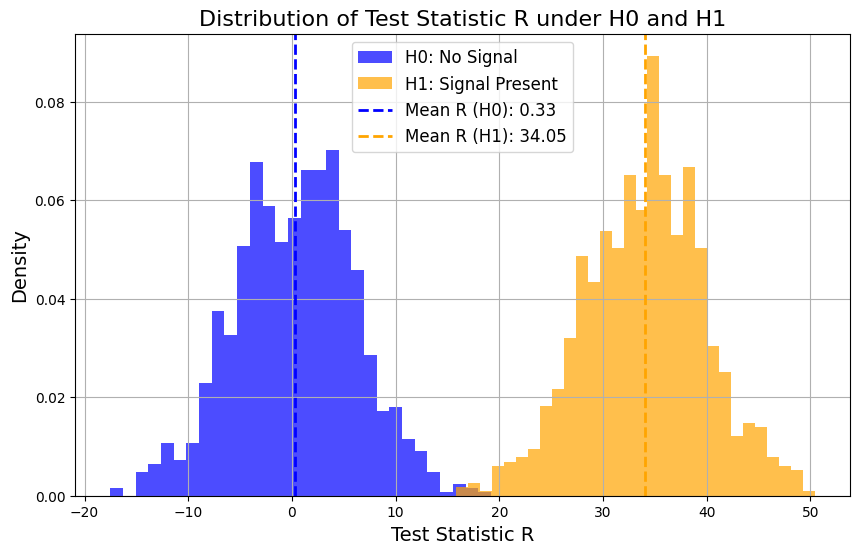

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义数据生成函数
def generate_data(n, signal=None, sigma=1.0):
    noise = np.random.normal(0, sigma, size=n)
    if signal is None:
        return noise  # 只有噪声
    return signal + noise  # 信号 + 噪声

# 定义协方差矩阵
def compute_covariance(n, sigma=1.0):
    return sigma**2 * np.eye(n)

# 计算检验统计量 R
def matched_filter(x, signal, covariance_matrix):
    sigma_inv = np.linalg.inv(covariance_matrix)
    return signal.T @ sigma_inv @ x

# 参数设置
n = 100  # 数据维度
sigma = 1.0  # 噪声标准差
signal = np.random.uniform(-1, 1, size=n)  # 随机生成信号向量 s

# 样本数量
num_samples = 1000

# 构造协方差矩阵
covariance_matrix = compute_covariance(n, sigma=sigma)

# 生成 H0 和 H1 下的检验统计量 R
R_h0 = [matched_filter(generate_data(n, signal=None, sigma=sigma), signal, covariance_matrix) for _ in range(num_samples)]
R_h1 = [matched_filter(generate_data(n, signal=signal, sigma=sigma), signal, covariance_matrix) for _ in range(num_samples)]

# 绘制结果
plt.figure(figsize=(10, 6))
plt.hist(R_h0, bins=30, alpha=0.7, label="H0: No Signal", color="blue", density=True)
plt.hist(R_h1, bins=30, alpha=0.7, label="H1: Signal Present", color="orange", density=True)

# 添加图例和标签
plt.axvline(np.mean(R_h0), color="blue", linestyle="dashed", linewidth=2, label=f"Mean R (H0): {np.mean(R_h0):.2f}")
plt.axvline(np.mean(R_h1), color="orange", linestyle="dashed", linewidth=2, label=f"Mean R (H1): {np.mean(R_h1):.2f}")
plt.title("Distribution of Test Statistic R under H0 and H1", fontsize=16)
plt.xlabel("Test Statistic R", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurve
import batman
from celerite import GaussianProcess
from celerite.terms import Matern32Term

# 下载 Kepler 数据（第 5 季度）
def download_lightcurve():
    lc = search_lightcurve("Kepler-10", quarter=5).download()
    lc = lc.remove_nans().normalize()  # 移除空值并归一化
    return lc.time.value, lc.flux.value

# 添加假的凌星信号
def add_transit_signal(time, flux):
    # 定义凌星参数
    params = batman.TransitParams()
    params.t0 = 145.0  # 中心凌星时间
    params.per = 20.0  # 周期
    params.rp = 0.02   # 行星半径与恒星半径之比
    params.a = 15.0    # 半长轴与恒星半径之比
    params.inc = 87.0  # 轨道倾角
    params.ecc = 0.0   # 偏心率
    params.w = 90.0    # 近星点角
    params.u = [0.1, 0.3]  # 线性和二次抛物线系数
    params.limb_dark = "quadratic"  # 光球暗化模型

    m = batman.TransitModel(params, time)
    transit_flux = m.light_curve(params)
    return flux * transit_flux, transit_flux  # 添加信号后的数据和信号本身

# 高斯过程建模背景信号
def model_with_gp(time, flux):
    kernel = Matern32Term(log_sigma=np.log(0.1), log_rho=np.log(10.0))  # Matern 3/2 核
    gp = GaussianProcess(kernel)
    gp.compute(time, yerr=0.01)  # 设置误差
    gp_flux = gp.predict(flux, return_cov=False)
    return gp, gp_flux

# 计算 Matched Filter 检验统计量
def matched_filter(flux, template, covariance_matrix):
    sigma_inv = np.linalg.inv(covariance_matrix)
    return template.T @ sigma_inv @ flux

# 主程序
time, flux = download_lightcurve()

# 添加假的凌星信号
flux_with_transit, transit_flux = add_transit_signal(time, flux)

# 使用高斯过程拟合背景信号
gp, flux_gp = model_with_gp(time, flux_with_transit)

# 构造协方差矩阵
covariance_matrix = gp.get_matrix(time)

# 计算有凌星和无凌星的检验统计量
R_with_transit = matched_filter(flux_with_transit, transit_flux, covariance_matrix)
R_no_transit = matched_filter(flux_gp, transit_flux, covariance_matrix)

# 绘图展示结果
plt.figure(figsize=(12, 8))

# 原始光变曲线
plt.subplot(3, 1, 1)
plt.plot(time, flux, ".", color="gray", alpha=0.5, label="Original Flux")
plt.title("Original Light Curve", fontsize=14)
plt.legend()

# 添加凌星后的光变曲线
plt.subplot(3, 1, 2)
plt.plot(time, flux_with_transit, ".", color="orange", alpha=0.7, label="Flux with Transit")
plt.plot(time, transit_flux, color="blue", linewidth=2, label="Transit Signal")
plt.title("Light Curve with Added Transit Signal", fontsize=14)
plt.legend()

# 高斯过程拟合结果
plt.subplot(3, 1, 3)
plt.plot(time, flux_with_transit, ".", color="orange", alpha=0.5, label="Observed Flux")
plt.plot(time, flux_gp, color="green", linewidth=2, label="GP Fit")
plt.title("Gaussian Process Fit", fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

# 输出检验统计量
print(f"Matched Filter Statistic with Transit: {R_with_transit:.4f}")
print(f"Matched Filter Statistic without Transit: {R_no_transit:.4f}")


ModuleNotFoundError: No module named 'batman'